<a href="https://colab.research.google.com/github/akash3952/diabetes_pred/blob/main/ISYE6740_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
import keras_tuner
import warnings
import joblib
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [4]:
df= pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.sample(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
239536,0.0,0.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,8.0,5.0,4.0
25950,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
119832,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,6.0,6.0
188449,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,6.0,4.0
213391,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,5.0,0.0,0.0,1.0,2.0,6.0,8.0
159222,0.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,3.0,8.0
52515,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,10.0,0.0,0.0,2.0,5.0,6.0
94683,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
63427,0.0,0.0,0.0,0.0,27.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,7.0
210849,2.0,1.0,1.0,1.0,43.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,30.0,0.0,0.0,11.0,5.0,7.0


## EDA

In [ ]:
df.columns


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


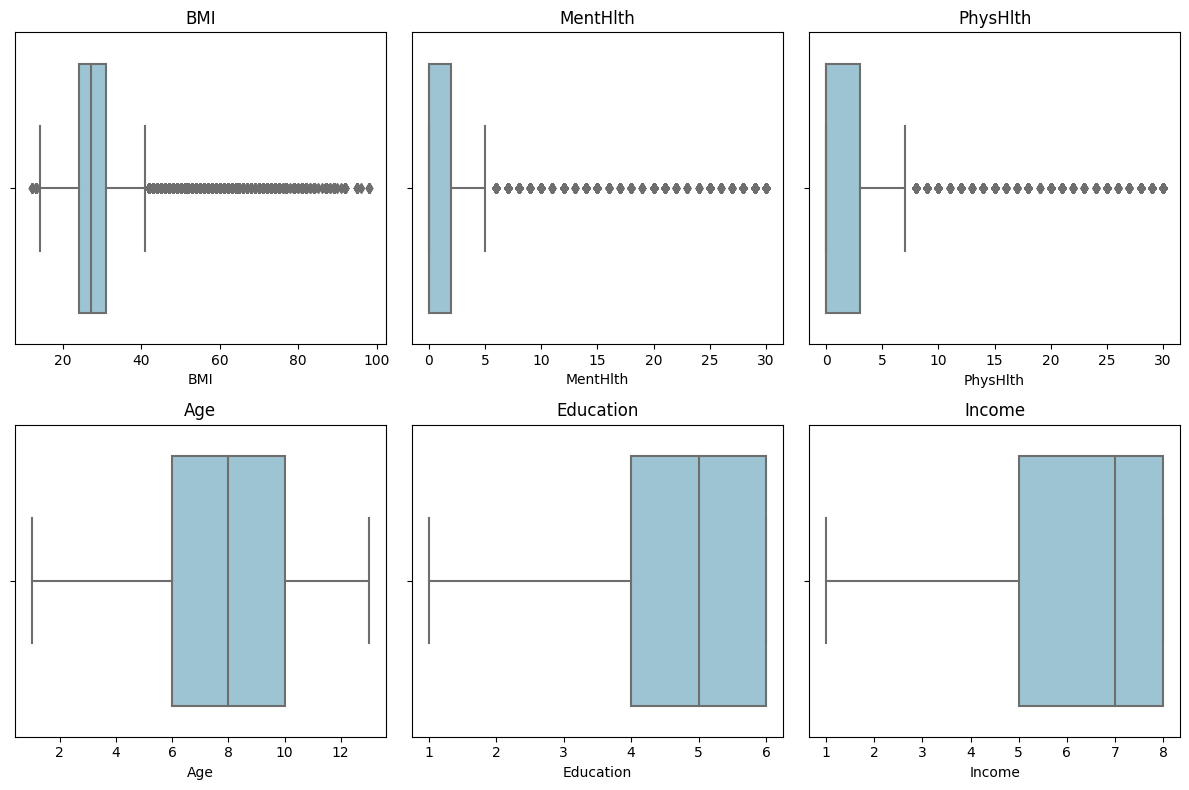

In [ ]:
# Detecting outlier
numeric_columns = ['BMI','MentHlth','PhysHlth','Age','Education','Income']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axes = axes.flatten()

# Loop through numeric columns and create box plots
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], color='#93c9db', ax = axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


<Axes: xlabel='BMI', ylabel='Count'>

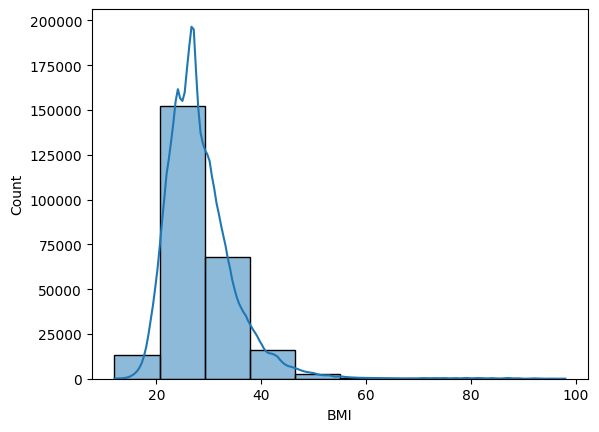

In [ ]:
#BMI data distribution
sns.histplot(x= df['BMI'], data= df, bins =10,kde=True)

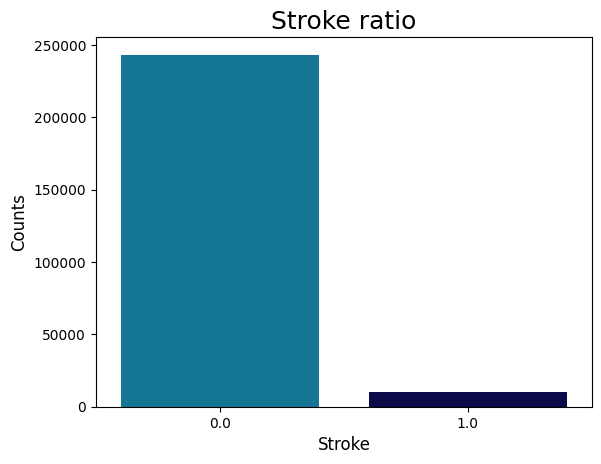

In [ ]:
#Stroke ratio in our dataset.
sns.countplot(data=df, x='Stroke', palette='ocean_r')
plt.title('Stroke ratio', fontsize=18)
plt.xlabel('Stroke', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

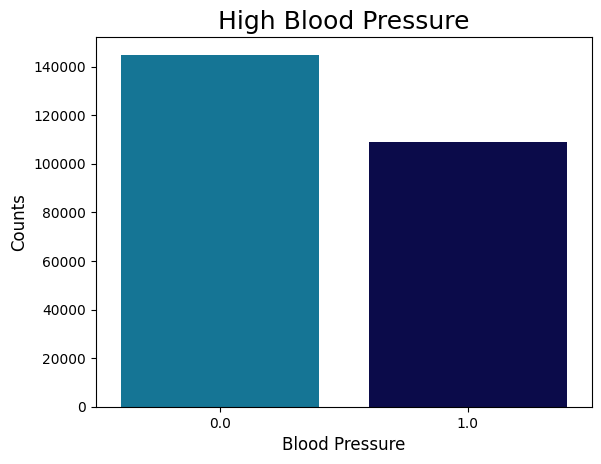

In [ ]:
#HighBP ratio in our data.
sns.countplot(data=df, x='HighBP', palette='ocean_r')
plt.title('High Blood Pressure', fontsize=18)
plt.xlabel('Blood Pressure', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

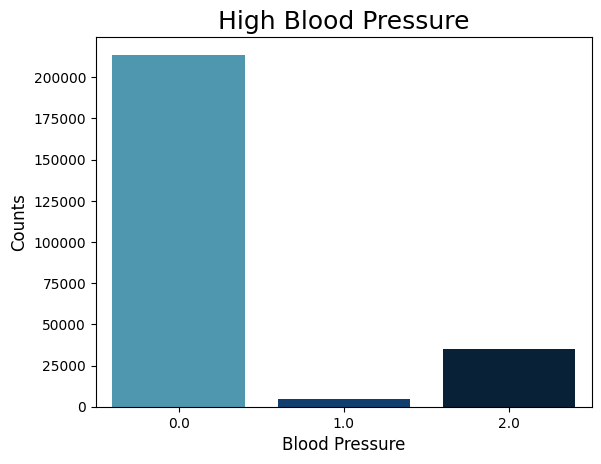

In [ ]:
#Dependent variable ratio in our data.
sns.countplot(data=df, x='Diabetes_012', palette='ocean_r')
plt.title('High Blood Pressure', fontsize=18)
plt.xlabel('Blood Pressure', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

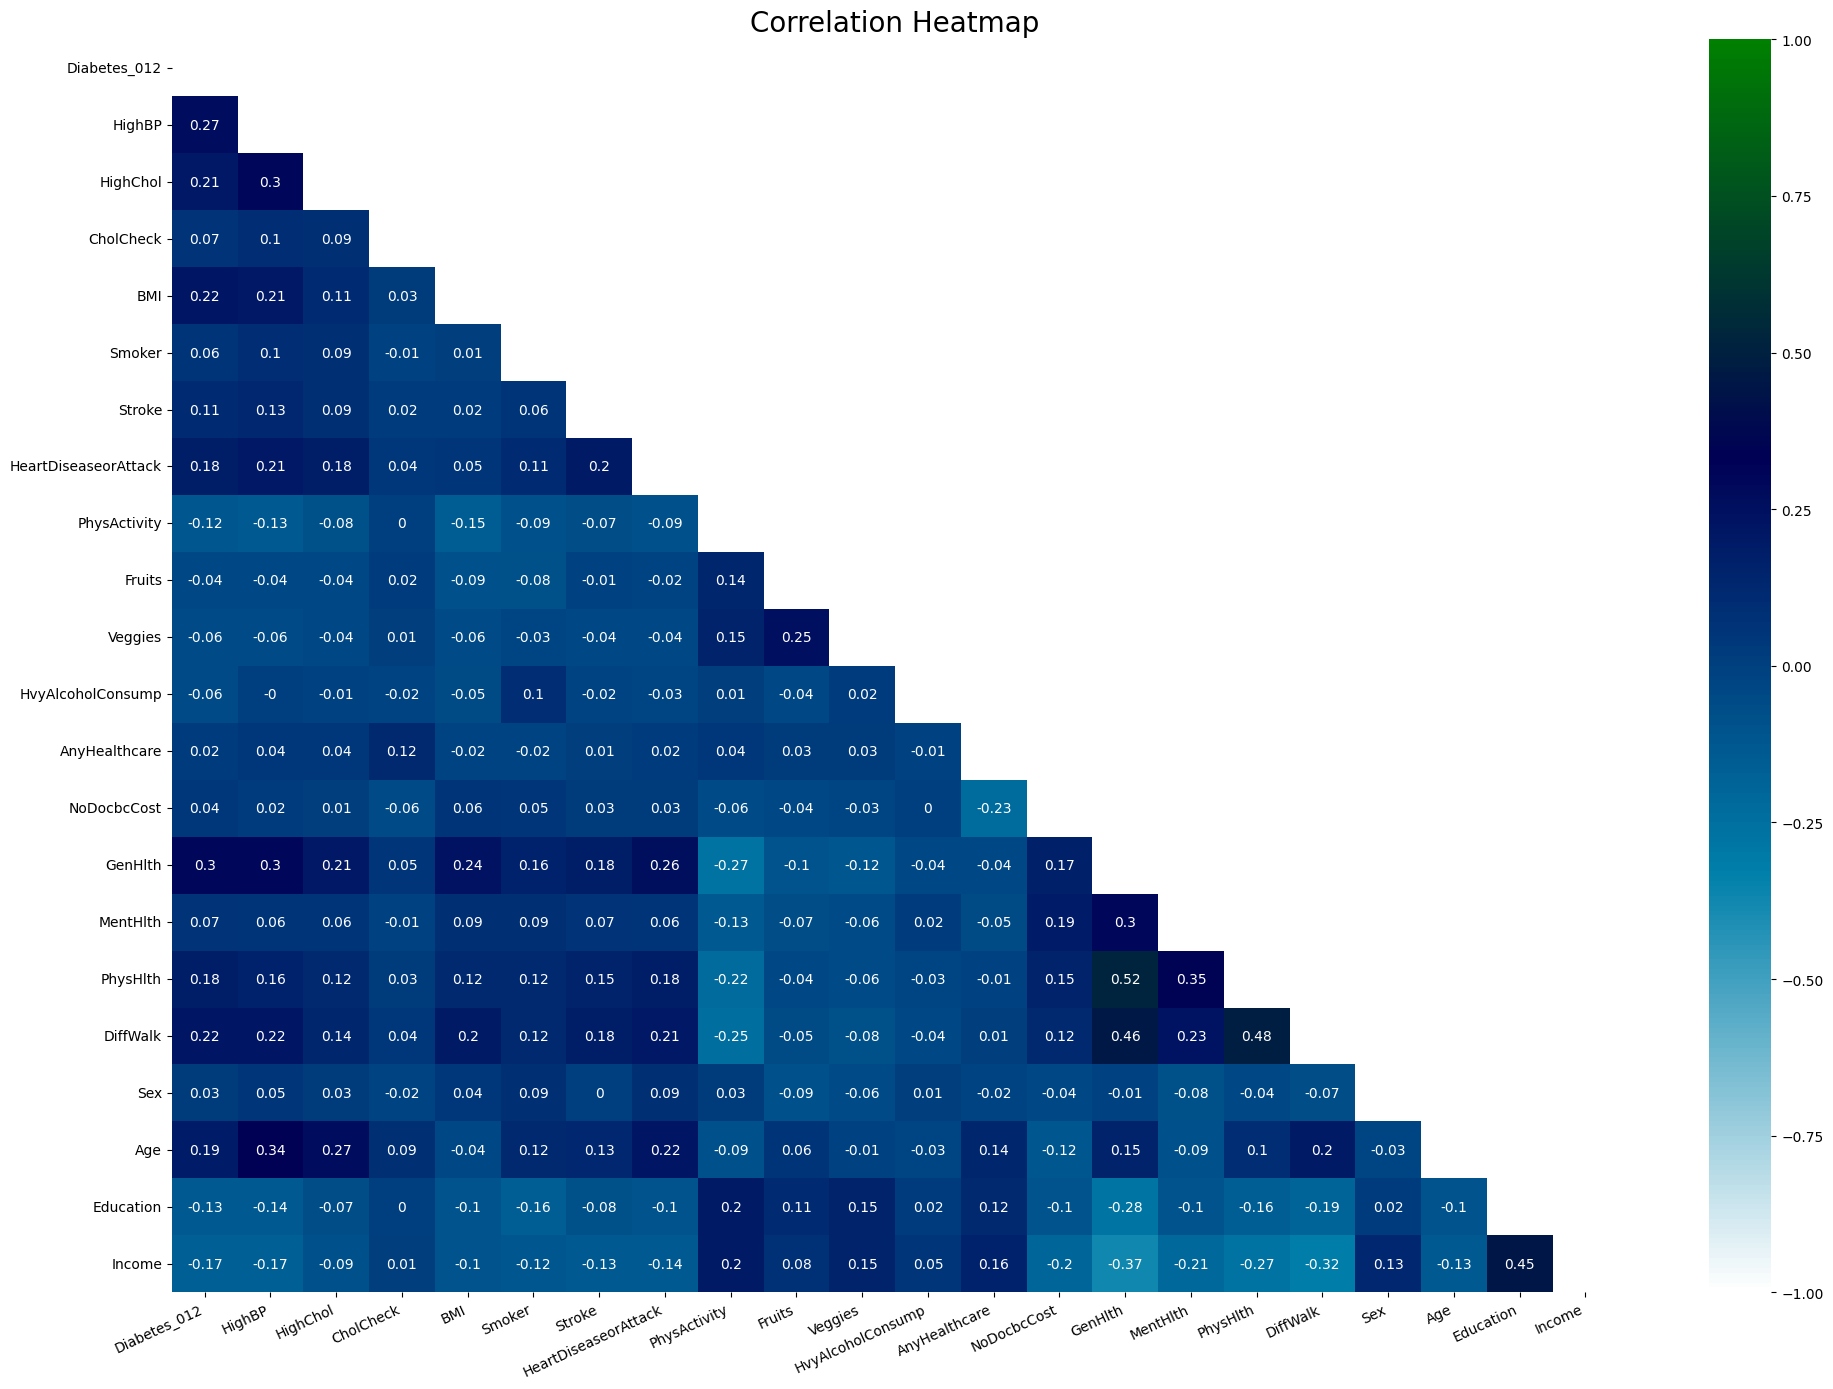

In [ ]:
#feature Correlation Matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,14))
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr_matrix.round(2), mask=mask, ax=ax, annot=True, vmin=-1, vmax=1, annot_kws={'fontsize':10}, cmap='ocean_r')
ax.set_xticklabels(ax.xaxis.get_ticklabels())
ax.set_yticklabels(ax.yaxis.get_ticklabels())
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

In [5]:
#Standardizing the data
scaler = StandardScaler()
X = df.drop('Diabetes_012',axis=1) #Drop the dependent variable
y = df['Diabetes_012']
scaled_data = scaler.fit_transform(X)
scaled_data.shape

(253680, 21)

PCA

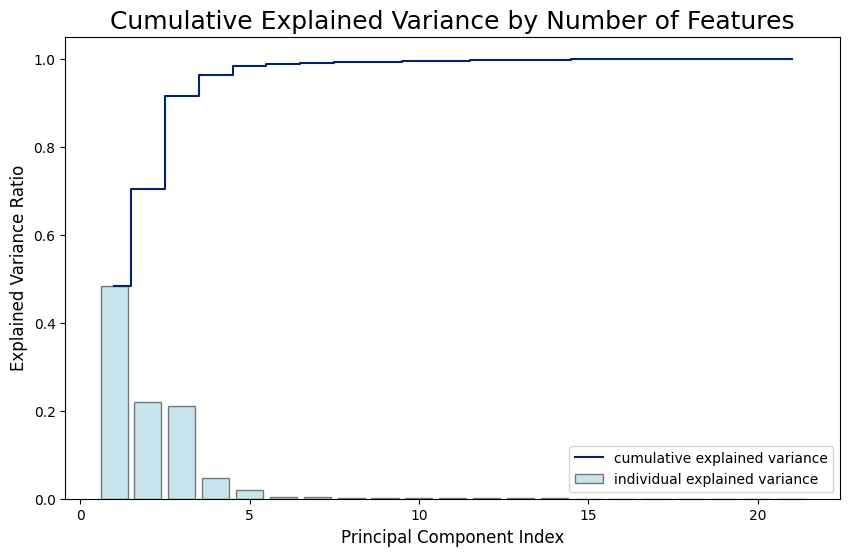

In [6]:
# Apply PCA
cov_mat = np.cov(X.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Calculate cumulative sum of explained variances.
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot explained variances
plt.figure(figsize=(10,6))
plt.bar(range(1,22), var_exp, alpha=0.5, align='center', label='individual explained variance', color='#93c9db', edgecolor = 'black')
plt.step(range(1,22), cum_var_exp, where='mid', label='cumulative explained variance', color='#00246d')
plt.title('Cumulative Explained Variance by Number of Features', fontsize=18)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xlabel('Principal Component Index', fontsize=12)
plt.legend(loc='best')
plt.show()

In [7]:
# 99% of the variance is explained with seven components.
print(f'Cumulative explained variance from PCA components: {cum_var_exp[6]:.3f}.')
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)
X_pca.shape

Cumulative explained variance from PCA components: 0.991.


(253680, 7)

In [8]:
#Split data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train.shape[1]

7

In [18]:
X_test.shape

(76104, 7)

SVM

In [ ]:
svm = SVC()

#Hyperparameter to tune
param_grid= {
    'C': [1,3,5,10],
    'kernel': ['linear','rbf','poly'],
    'gamma': ['scale','auto',1.0,2.0]
}

#Creating GridSerachCV object to find the optimial values of parameters
svm_grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy',n_jobs=-1)


# Fit the model
svm_grid_search.fit(X_train, y_train)

In [ ]:
print("Best Hyperparameters:", svm_grid_search.best_params_)


In [ ]:
svm_classifier = SVC(**svm_grid_search.best_params_)
svm_classifier.fit(X_train,y_train)

In [ ]:
accuracy = svm_classifier.score(X_test,y_test)
print('Test accuracy of the fine tuned SVM is:',accuracy)

Neural Network

In [10]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
  for i in range(hp.Int('num_layers',2,15)):
    units = hp.Int('units_' + str(i), min_value=8, max_value=256, step=16)
    activation = hp.Choice('act_'+str(i), ['relu','sigmoid','softmax','tanh'])
    model.add(keras.layers.Dense(units=units, activation=activation))
  model.add(keras.layers.Dense(3, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4,1e-5])),
                metrics = ['accuracy'])
  return model


tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory ='diabetes_project',
    project_name = 'Diabetes Classification'
    )

In [11]:
tuner.search(X_train,y_train,epochs=5,validation_split=0.2)

Trial 5 Complete [00h 05m 14s]
val_accuracy: 0.8432255983352661

Best val_accuracy So Far: 0.8458722829818726
Total elapsed time: 00h 35m 40s


In [12]:
tuner.results_summary()

Results summary
Results in diabetes_project/Diabetes Classification
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 6
units_0: 232
act_0: softmax
units_1: 216
act_1: sigmoid
learning_rate: 0.0001
units_2: 120
act_2: sigmoid
units_3: 120
act_3: tanh
units_4: 200
act_4: sigmoid
units_5: 248
act_5: tanh
units_6: 232
act_6: relu
units_7: 104
act_7: softmax
units_8: 24
act_8: tanh
units_9: 216
act_9: relu
units_10: 216
act_10: softmax
Score: 0.8458722829818726

Trial 0 summary
Hyperparameters:
num_layers: 11
units_0: 40
act_0: softmax
units_1: 184
act_1: softmax
learning_rate: 0.01
units_2: 8
act_2: relu
units_3: 8
act_3: relu
units_4: 8
act_4: relu
units_5: 8
act_5: relu
units_6: 8
act_6: relu
units_7: 8
act_7: relu
units_8: 8
act_8: relu
units_9: 8
act_9: relu
units_10: 8
act_10: relu
Score: 0.8432255983352661

Trial 2 summary
Hyperparameters:
num_layers: 15
units_0: 168
act_0: softmax
units_1: 232
act_1: relu
learning_r

In [13]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)

In [15]:
#build the model with the best hyperparamters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with the entire dataset
best_model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
4440/4440 [==============================] - 32s 6ms/step - loss: 0.4552 - accuracy: 0.8401 - val_loss: 0.4179 - val_accuracy: 0.8432
Epoch 2/50
4440/4440 [==============================] - 27s 6ms/step - loss: 0.4152 - accuracy: 0.8421 - val_loss: 0.4177 - val_accuracy: 0.8432
Epoch 3/50
4440/4440 [==============================] - 24s 5ms/step - loss: 0.4117 - accuracy: 0.8428 - val_loss: 0.4055 - val_accuracy: 0.8464
Epoch 4/50
4440/4440 [==============================] - 25s 6ms/step - loss: 0.4102 - accuracy: 0.8440 - val_loss: 0.4057 - val_accuracy: 0.8458
Epoch 5/50
4440/4440 [==============================] - 25s 6ms/step - loss: 0.4096 - accuracy: 0.8439 - val_loss: 0.4049 - val_accuracy: 0.8467
Epoch 6/50
4440/4440 [==============================] - 25s 6ms/step - loss: 0.4087 - accuracy: 0.8444 - val_loss: 0.4049 - val_accuracy: 0.8462
Epoch 7/50
4440/4440 [==============================] - 25s 6ms/step - loss: 0.4081 - accuracy: 0.8449 - val_loss: 0.4051 - val_ac

In [17]:
results = best_model.evaluate(X_test,y_test)
print("Test data loss:", results[0])
print("Test data accuracy:", results[1])

2379/2379 [==============================] - 5s 2ms/step - loss: 0.4067 - accuracy: 0.8453
Test data loss: 0.4066632390022278
Test data accuracy: 0.8452774882316589


In [16]:
best_model.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
